# Instructions
To compile and run the exercise simply run with python3 `runner.py` in `ex6.1` folder.

In [59]:
import numpy as np
import matplotlib.pylab as plt

### Reading data

In [60]:
temp, metroenergy, metroenergy_error = np.loadtxt("ex6.1/metropolis/energy.dat", delimiter="\t", unpack=True)
temp, gibbsenergy, gibbsenergy_error = np.loadtxt("ex6.1/gibbs/energy.dat", delimiter="\t", unpack=True)

temp, metroheat, metroheat_error = np.loadtxt("ex6.1/metropolis/heat.dat", delimiter="\t", unpack=True)
temp, gibbsheat, gibbsheat_error = np.loadtxt("ex6.1/gibbs/heat.dat", delimiter="\t", unpack=True)

temp, metrochi, metrochi_error = np.loadtxt("ex6.1/metropolis/chi.dat", delimiter="\t", unpack=True)
temp, gibbschi, gibbschi_error = np.loadtxt("ex6.1/gibbs/chi.dat", delimiter="\t", unpack=True)

temp, metromag, metromag_error = np.loadtxt("ex6.1/metropolis/mag.dat", delimiter="\t", unpack=True)
temp, gibbsmag, gibbsmag_error = np.loadtxt("ex6.1/gibbs/mag.dat", delimiter="\t", unpack=True)

## Energy

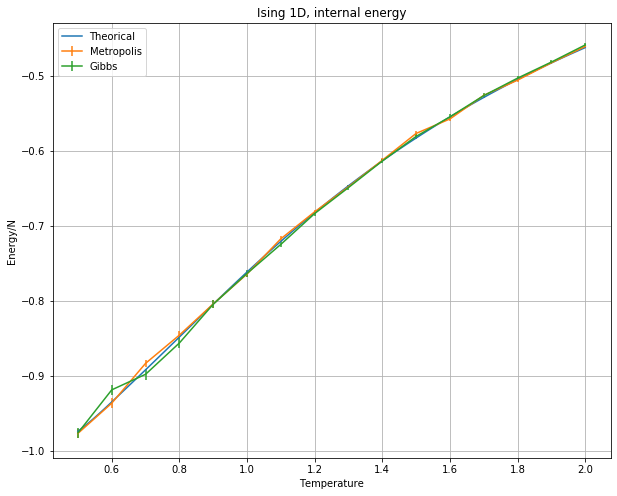

In [55]:
plt.figure(figsize=(10,8))
points=100
T = np.linspace(0.5,2.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
plt.plot(T, e, label="Theorical")

plt.errorbar(temp, metroenergy,yerr=metroenergy_error, label="Metropolis")
plt.errorbar(temp, gibbsenergy,yerr=gibbsenergy_error, label="Gibbs")
plt.legend()
plt.grid(True)
plt.title('Ising 1D, internal energy')
plt.xlabel("Temperature")
plt.ylabel("Energy/N" )
plt.show()

## Capacity

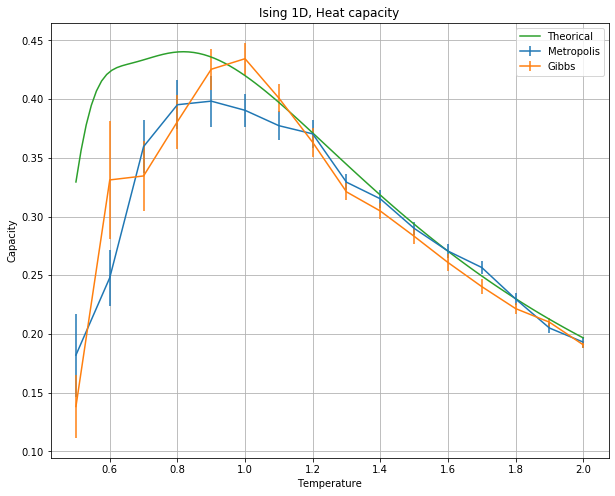

In [56]:
plt.figure(figsize=(10,8))
plt.errorbar(temp, metroheat,yerr=metroheat_error, label = "Metropolis")
plt.errorbar(temp, gibbsheat,yerr=gibbsheat_error, label = "Gibbs")
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.plot(T, heat, label ="Theorical")
plt.title('Ising 1D, Heat capacity')
plt.xlabel('Temperature')
plt.ylabel('Capacity')
plt.legend()
plt.grid(True)
plt.show()

Both sampling methods aren't completely in accordance with the theorical model, I have to admit I didn't understand the reason completely.

## Susceptibility

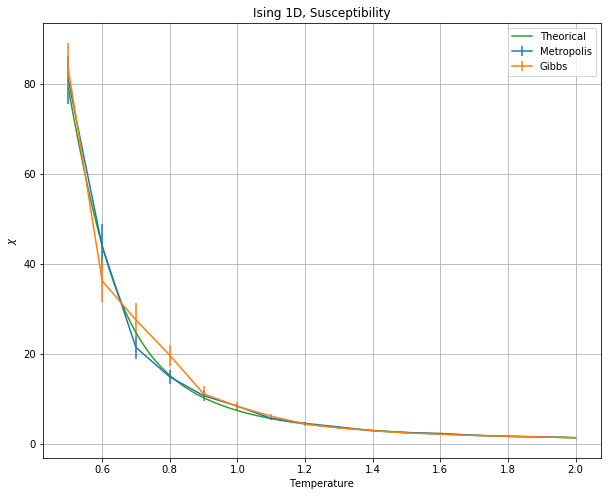

In [57]:
plt.figure(figsize=(10,8))
plt.errorbar(temp, metrochi,yerr=metrochi_error, label="Metropolis")
plt.errorbar(temp, gibbschi,yerr=gibbschi_error, label="Gibbs")
plt.grid(True)
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.plot(T, X, label="Theorical")
plt.legend()
plt.title('Ising 1D, Susceptibility')
plt.xlabel('Temperature')
plt.ylabel("$\chi$")
plt.show()

## Magnetization

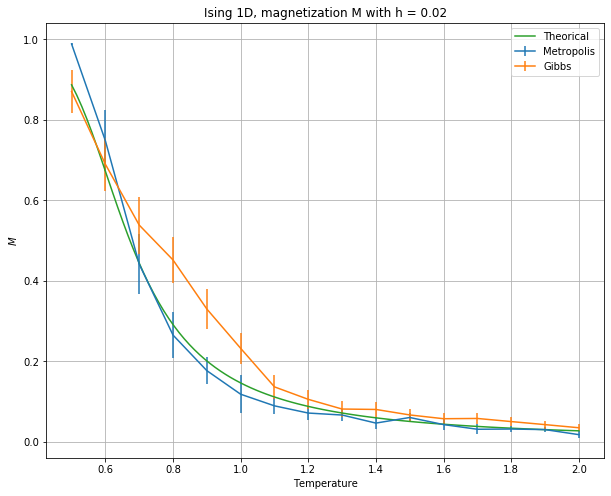

In [61]:
plt.figure(figsize=(10,8))
plt.errorbar(temp, metromag,yerr=metromag_error, label="Metropolis")
plt.errorbar(temp, gibbsmag,yerr=gibbsmag_error, label="Gibbs")
plt.grid(True)

h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
plt.plot(T, M, label="Theorical")
plt.legend()
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlabel('Temperature')
plt.ylabel('$M$')
plt.show()